Vale, lo primero que vamos a hacer es:
    - Mirar el margen de victoria con respecto a los rivales,  y comparar la temporada 2023 con la 2024
    - Una manera de representarlo puede ser la diferencia del tiempo total de la carrera con respecto a la media de todos los pilotos, o 
    con respecto al primer clasificado  (este tendra un +0 de diferencia) 
    - Se puede calcular por circuito, la media del año, y la cantidad total. Por pilotos y por equipos.
    - Representar con un grafico de barras, o con un scatter conectado de todas las carreras

Luego, también podemos mirar lo siguiente:
    - Hacer un estudio parecido pero teniendo en cuenta los compuestos que lleva cada coche en todo momento
    - Para esto, lo que se tendría en cuenta es la diferencia en cada vuelta de un piloto con respeto al resto, fijandose en dos cosas: 
        --La diferencia de un piloto con el resto que llevan el mismo compuesto
        --La diferencia de un piloto con el resto que llevan un compuesto distinto
    - Después, estos datos se guardaran por piloto, teniendo en cuenta la diferencia de tiempo de cada compuesto con respecto a los 3 posibles compuestos. De esta manera, se puede comparar la diferencia de tiempo entre cada piloto y cada compuesto.
    




In [47]:
#FUNCIONES Y LIBRERIAS

import fastf1
import fastf1.plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timple.timedelta import strftimedelta

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/1/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connection.py", line 464, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\http\client.py", lin

(90.0, 100.0)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\AppData\Local\Packa

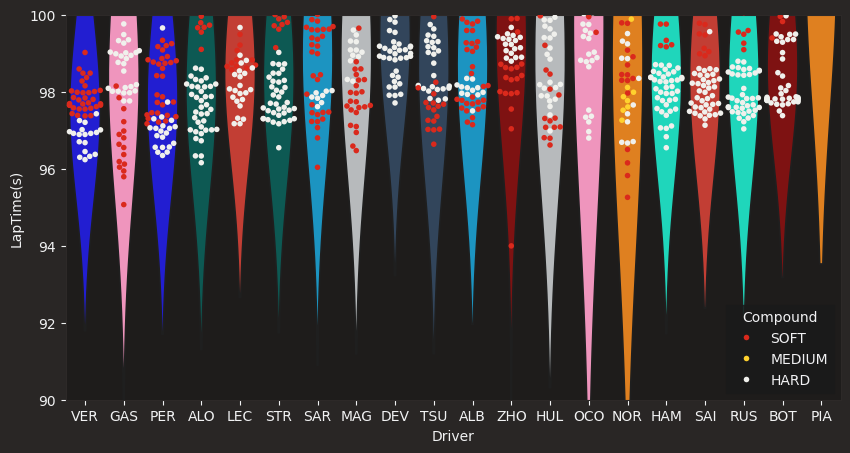

In [58]:
# ###FEATURE 2: COMPUESTOS

session = fastf1.get_session(2023, 1, 'R')  # Año, ronda, y 'R' para carrera
session.load()

# Obtener todas las vueltas de la sesión
laps = session.laps

# Filtrar las columnas necesarias: Piloto, compuesto de neumático y tiempo de vuelta
compuesto_laps = laps[['Driver', 'Compound', 'LapTime', 'TyreLife']]

conpuesto_laps = compuesto_laps.dropna(subset='LapTime')
compuesto_laps = compuesto_laps[compuesto_laps['Compound'] != 'UNKNOWN']

compuesto_laps['LapTime(s)'] = compuesto_laps['LapTime'].dt.total_seconds()

fig, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(data=compuesto_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               palette=fastf1.plotting.get_driver_color_mapping(session=session)
               )

sns.swarmplot(data=compuesto_laps,
              x="Driver",
              y="LapTime(s)",
              hue="Compound",
              palette=fastf1.plotting.get_compound_mapping(session=session),
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )

ax.set_ylim(90, 100)



In [53]:
for i in compuesto_laps['Compound']:
    if i == 'UNKNOWN':
        print(i)

UNKNOWN
UNKNOWN
UNKNOWN


In [10]:
##FEATURE 1

#YA TENGO UN DF CON LA ABREVIACION Y LA DIFERENCIA DE TIEMPO CON RESPECTO AL PRIMERO. 

#TENGO QUE MONTAR BIEN LA FUNCION, LOOPEARLO, Y GRAFICARLO


session = fastf1.get_session(2023, 1, 'R')  # 'R' para carrera (race)
session.load()

# Obtener las vueltas de todos los pilotos
laps = session.laps

# Filtrar los pilotos que no completaron la carrera
classification = session.results  # Resultados finales de la carrera
finished_pilots = classification[classification['Status'] == 'Finished']['DriverNumber'].tolist()

# Filtrar las vueltas solo para los pilotos que terminaron la carrera
drivers_finished = list(laps[laps['DriverNumber'].isin(finished_pilots)].DriverNumber.unique())

# Agrupar por piloto y sumar los tiempos de vuelta
tiempos_totales = laps.groupby('DriverNumber')['LapTime'].sum().dt.total_seconds()


#calcular la diferencia de cada piloto con respecto al primero
tiempos_finished = tiempos_totales.loc[drivers_finished]
diferencias = tiempos_finished - min(tiempos_finished)


#construir un DF con la abreviacion de los pilotos y con la diferencia de tiempo
results = session.results[['DriverNumber', 'Abbreviation']] 
results.set_index('DriverNumber', inplace=True)
df_final = pd.DataFrame(diferencias).join(results)
df_final.columns = ['TimeDifference', 'DriverAbbreviation']

# Ordenar por diferencia de tiempo
df_final.sort_values(by='TimeDifference', inplace=True)

df_final


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/1/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connection.py", line 464, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\http\client.py", lin

,TimeDifference,DriverAbbreviation
DriverNumber,,
1,0.000,VER
11,11.987,PER
14,38.637,ALO
55,48.052,SAI
44,50.977,HAM
18,54.502,STR
63,55.873,RUS
77,72.647,BOT
10,73.753,GAS


,TimeDifference,DriverAbbreviation
DriverNumber,,
1,0 days 00:00:00,VER
11,0 days 00:00:11.987000,PER
14,0 days 00:00:38.637000,ALO
55,0 days 00:00:48.052000,SAI
44,0 days 00:00:50.977000,HAM
18,0 days 00:00:54.502000,STR
63,0 days 00:00:55.873000,RUS
77,0 days 00:01:12.647000,BOT
10,0 days 00:01:13.753000,GAS


In [5]:

def obtener_diferencias_carrera(year, round_number):
    session = fastf1.get_session(year, round_number, 'R')
    session.load()

    # Obtener resultados de la clasificación final de todos los pilotos
    classification = session.results  # Resultados oficiales de la carrera

    # Obtener solo los pilotos que tienen un tiempo de carrera válido
    tiempos_totales = classification[['DriverNumber', 'LapTime', 'Status']]

    # Filtrar pilotos que han completado la carrera y calcular la diferencia con el primero
    tiempos_totales['LapTime'] = tiempos_totales['LapTime'].apply(lambda x: x.total_seconds() if pd.notnull(x) else None)
    tiempos_validos = tiempos_totales[tiempos_totales['LapTime'].notnull()]
    tiempos_validos['Diferencia'] = tiempos_validos['LapTime'] - tiempos_validos['LapTime'].min()

    # Agregar la abreviatura de cada piloto
    tiempos_validos = tiempos_validos.join(classification[['DriverNumber', 'Abbreviation']].set_index('DriverNumber'), on='DriverNumber')

    return tiempos_validos[['Abbreviation', 'Diferencia']]


In [ ]:
results

In [7]:
result = obtener_diferencias_carrera(2024, 14)

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
Request for URL https://ergast.com/api/f1/2024/14/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connection.py", l

KeyError: "['LapTime'] not in index"

In [28]:
year = 2024

round_number = 17

session = fastf1.get_session(year, round_number, 'R')
session.load()

# Obtener resultados de la clasificación final de todos los pilotos
classification = session.results  # Resultados oficiales de la carrera

classification
# # Obtener solo los pilotos que tienen un tiempo de carrera válido
tiempos_totales = classification[['DriverNumber', 'Time', 'Status']]

#Convertir a segundos
tiempos_totales['Diferencia'] = tiempos_totales['Time'].apply(lambda x: x.total_seconds() if pd.notnull(x) else None)

tiempos_totales.loc[tiempos_totales['Status'].isin(['+1 Lap', 'Retired']), 'Time'] = 
# Coger el tiempo de cada piloto (diferencia con el primero)
tiempos_validos = tiempos_totales[tiempos_totales['Time'].notnull()]
tiempos_validos.reset_index(drop=True, inplace=True)


tiempos_validos.at[0, 'Time'] = 0


# Agregar la abreviatura de cada piloto
tiempos_validos = tiempos_validos.join(classification[['DriverNumber', 'Abbreviation']].set_index('DriverNumber'), on='DriverNumber')

# tiempos_validos[['Abbreviation', 'Diferencia']]
tiempos_validos

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '16', '63', '4', '1', '14', '23', '43', '44', '50', '27', '10', '3', '24', '31', '77', '11', '55', '18', '22']
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15492\182995

,DriverNumber,Time,Status,Abbreviation
0,81,0.000,Finished,PIA
1,16,10.910,Finished,LEC
2,63,31.328,Finished,RUS
3,4,36.143,Finished,NOR
4,1,77.098,Finished,VER
5,14,85.468,Finished,ALO
6,23,87.396,Finished,ALB
7,43,89.541,Finished,COL
8,44,92.401,Finished,HAM
9,50,93.127,Finished,BEA


In [18]:
obtener_diferencias_carrera(2024, 17)

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '16', '63', '4', '1', '14', '23', '43', '44', '50', '27', '10', '3', '24', '31', '77', '11', '55', '18', '22']


KeyError: "['LapTime'] not in index"

In [16]:
schedule = fastf1.get_event_schedule(2024)
carreras = schedule[schedule['EventName'].notna()]  # Filtrar solo eventos válidos

df_temporada = pd.DataFrame()

# for round_number, row in carreras.iterrows():
#     try:
#         df_carrera = obtener_diferencias_carrera(2024, round_number)

#         # Usar la abreviación de los pilotos como índice y añadir una columna con el nombre de la carrera
#         df_temporada[row['EventName']] = df_carrera.set_index('Abbreviation')['Diferencia']
#     except Exception as e:
#         print(f"Error procesando {row['EventName']}: {e}")

# df_temporada

In [17]:
carreras

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2024,2024-02-23,Pre-Season Testing,testing,Practice 1,2024-02-21 10:00:00+03:00,2024-02-21 07:00:00,...,Practice 3,2024-02-23 10:00:00+03:00,2024-02-23 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024,2024-03-02,Bahrain Grand Prix,conventional,Practice 1,2024-02-29 14:30:00+03:00,2024-02-29 11:30:00,...,Practice 3,2024-03-01 15:30:00+03:00,2024-03-01 12:30:00,Qualifying,2024-03-01 19:00:00+03:00,2024-03-01 16:00:00,Race,2024-03-02 18:00:00+03:00,2024-03-02 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024,2024-03-09,Saudi Arabian Grand Prix,conventional,Practice 1,2024-03-07 16:30:00+03:00,2024-03-07 13:30:00,...,Practice 3,2024-03-08 16:30:00+03:00,2024-03-08 13:30:00,Qualifying,2024-03-08 20:00:00+03:00,2024-03-08 17:00:00,Race,2024-03-09 20:00:00+03:00,2024-03-09 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024,2024-03-24,Australian Grand Prix,conventional,Practice 1,2024-03-22 12:30:00+11:00,2024-03-22 01:30:00,...,Practice 3,2024-03-23 12:30:00+11:00,2024-03-23 01:30:00,Qualifying,2024-03-23 16:00:00+11:00,2024-03-23 05:00:00,Race,2024-03-24 15:00:00+11:00,2024-03-24 04:00:00,True
4,4,Japan,Suzuka,FORMULA 1 MSC CRUISES JAPANESE GRAND PRIX 2024,2024-04-07,Japanese Grand Prix,conventional,Practice 1,2024-04-05 11:30:00+09:00,2024-04-05 02:30:00,...,Practice 3,2024-04-06 11:30:00+09:00,2024-04-06 02:30:00,Qualifying,2024-04-06 15:00:00+09:00,2024-04-06 06:00:00,Race,2024-04-07 14:00:00+09:00,2024-04-07 05:00:00,True
5,5,China,Shanghai,FORMULA 1 LENOVO CHINESE GRAND PRIX 2024,2024-04-21,Chinese Grand Prix,sprint_qualifying,Practice 1,2024-04-19 11:30:00+08:00,2024-04-19 03:30:00,...,Sprint,2024-04-20 11:00:00+08:00,2024-04-20 03:00:00,Qualifying,2024-04-20 15:00:00+08:00,2024-04-20 07:00:00,Race,2024-04-21 15:00:00+08:00,2024-04-21 07:00:00,True
6,6,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2024,2024-05-05,Miami Grand Prix,sprint_qualifying,Practice 1,2024-05-03 12:30:00-04:00,2024-05-03 16:30:00,...,Sprint,2024-05-04 12:00:00-04:00,2024-05-04 16:00:00,Qualifying,2024-05-04 16:00:00-04:00,2024-05-04 20:00:00,Race,2024-05-05 16:00:00-04:00,2024-05-05 20:00:00,True
7,7,Italy,Imola,FORMULA 1 MSC CRUISES GRAN PREMIO DEL MADE IN ...,2024-05-19,Emilia Romagna Grand Prix,conventional,Practice 1,2024-05-17 13:30:00+02:00,2024-05-17 11:30:00,...,Practice 3,2024-05-18 12:30:00+02:00,2024-05-18 10:30:00,Qualifying,2024-05-18 16:00:00+02:00,2024-05-18 14:00:00,Race,2024-05-19 15:00:00+02:00,2024-05-19 13:00:00,True
8,8,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2024,2024-05-26,Monaco Grand Prix,conventional,Practice 1,2024-05-24 13:30:00+02:00,2024-05-24 11:30:00,...,Practice 3,2024-05-25 12:30:00+02:00,2024-05-25 10:30:00,Qualifying,2024-05-25 16:00:00+02:00,2024-05-25 14:00:00,Race,2024-05-26 15:00:00+02:00,2024-05-26 13:00:00,True
9,9,Canada,Montréal,FORMULA 1 AWS GRAND PRIX DU CANADA 2024,2024-06-09,Canadian Grand Prix,conventional,Practice 1,2024-06-07 13:30:00-04:00,2024-06-07 17:30:00,...,Practice 3,2024-06-08 12:30:00-04:00,2024-06-08 16:30:00,Qualifying,2024-06-08 16:00:00-04:00,2024-06-08 20:00:00,Race,2024-06-09 14:00:00-04:00,2024-06-09 18:00:00,True


In [12]:

# Función para calcular la diferencia de tiempos de una carrera
def obtener_diferencias_carrera(year, round_number):
    session = fastf1.get_session(year, round_number, 'R')
    session.load()

    # Obtener resultados de la clasificación final de todos los pilotos
    classification = session.results  # Resultados oficiales de la carrera

    classification
    # # Obtener solo los pilotos que tienen un tiempo de carrera válido
    tiempos_totales = classification[['DriverNumber', 'Time', 'Status']]

    #Convertir a segundos
    tiempos_totales['Time'] = tiempos_totales['Time'].apply(lambda x: x.total_seconds() if pd.notnull(x) else None)


    # # Filtrar pilotos que han completado la carrera y calcular la diferencia con el primero
    tiempos_validos = tiempos_totales[tiempos_totales['Time'].notnull()]
    tiempos_validos.reset_index(drop=True, inplace=True)
    tiempos_validos.at[0, 'Time'] = 0


    # Agregar la abreviatura de cada piloto
    tiempos_validos = tiempos_validos.join(classification[['DriverNumber', 'Abbreviation']].set_index('DriverNumber'), on='DriverNumber')

    return tiempos_validos


# Función para obtener las diferencias de tiempo de toda una temporada
def obtener_diferencias_temporada(year):
    # Obtener el calendario de eventos de la temporada
    schedule = fastf1.get_event_schedule(year)
    carreras = schedule[schedule['EventName'].notna()]  # Filtrar solo eventos válidos

    df_temporada = pd.DataFrame()

    for round_number, row in carreras.iterrows():
        try:
            df_carrera = obtener_diferencias_carrera(year, round_number)

            # Usar la abreviación de los pilotos como índice y añadir una columna con el nombre de la carrera
            df_temporada[row['EventName']] = df_carrera.set_index('Abbreviation')['Diferencia']
        except Exception as e:
            print(f"Error procesando {row['EventName']}: {e}")

    return df_temporada

# Ejemplo: Obtener las diferencias de tiempo para toda la temporada 2023
diferencias_temporada_2023 = obtener_diferencias_temporada(2023)

# Mostrar el DataFrame con todas las diferencias de tiempo por carrera
print(diferencias_temporada_2023)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Pre-Season Testing: Cannot get testing event by round number!


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Bahrain Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '14', '63', '44', '55', '16', '31', '10', '20', '22', '27', '24', '21', '81', '2', '4', '77', '23', '18']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Saudi Arabian Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '14', '18', '11', '4', '27', '81', '24', '22', '77', '55', '10', '31', '21', '2', '20', '63', '23', '16']
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Australian Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', '22', '81', '23', '20', '10', '31', '2', '27', '77', '24', '21']
core           INFO 	Loading data for Miami Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Azerbaijan Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '63', '55', '44', '16', '10', '31', '20', '22', '18', '77', '23', '27', '24', '4', '21', '81', '2']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Miami Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Monaco Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '22', '81', '21', '27', '23', '4', '20', '77', '2']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Spanish Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '44', '16', '55', '11', '23', '31', '18', '77', '81', '10', '4', '22', '27', '24', '20', '21', '63', '2']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Canadian Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']
core           INFO 	Loading data for British Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Austrian Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando British Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '44', '81', '63', '16', '55', '14', '18', '23', '77', '3', '27', '22', '24', '20', '2', '31', '10']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Hungarian Grand Prix: "['LapTime'] not in index"


Request for URL https://ergast.com/api/f1/2023/12/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connection.py", line 464, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 1428, in getresponse
    response.begin()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 331, in 

Error procesando Belgian Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27', '40', '77', '22', '20', '63', '24', '16', '2']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Dutch Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Italian Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 18
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 18)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '4', '44', '16', '1', '10', '81', '11', '40', '20', '23', '24', '27', '2', '14', '63', '77', '31', '22', '18']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.4.0]
req            INFO 	U

Error procesando Singapore Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '22', '24', '27', '20', '23', '2', '18', '11', '77']
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Japanese Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 55
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 55)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '63', '16', '14', '31', '77', '24', '11', '18', '10', '23', '20', '22', '27', '40', '2', '44', '55']
core           INFO 	Loading data for United States Grand Prix - Race [v3.4.0]
req            IN

Error procesando Qatar Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '55', '11', '63', '10', '18', '22', '23', '2', '27', '77', '24', '20', '3', '14', '81', '31', '44', '16']
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando United States Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23', '31', '10', '22', '27', '24', '77', '2', '18', '14', '20', '11']
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Error procesando Mexico City Grand Prix: "['LapTime'] not in index"


Request for URL https://ergast.com/api/f1/2023/20/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connection.py", line 464, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 1428, in getresponse
    response.begin()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 331, in 

Error procesando São Paulo Grand Prix: "['LapTime'] not in index"


Request for URL https://ergast.com/api/f1/2023/21/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connection.py", line 464, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 1428, in getresponse
    response.begin()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 331, in 

Error procesando Las Vegas Grand Prix: "['LapTime'] not in index"


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '11', '4', '81', '14', '22', '44', '18', '3', '31', '10', '23', '27', '2', '24', '55', '77', '20']


Error procesando Abu Dhabi Grand Prix: "['LapTime'] not in index"


UnboundLocalError: cannot access local variable 'df_carrera' where it is not associated with a value

In [6]:
diferencias_temporada_2023

,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Azerbaijan Grand Prix,Miami Grand Prix,Monaco Grand Prix,Spanish Grand Prix,Canadian Grand Prix,Austrian Grand Prix,British Grand Prix,...,Italian Grand Prix,Singapore Grand Prix,Japanese Grand Prix,Qatar Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix,Las Vegas Grand Prix,Abu Dhabi Grand Prix,DriverAbbreviation
DriverNumber,,,,,,,,,,,,,,,,,,,,,
1,0 days 00:00:00,0 days 00:00:32.718000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,...,0 days 00:00:23.018000,0 days 00:03:08.739000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:03.968000,0 days 00:00:00,VER
11,0 days 00:00:11.987000,0 days 00:00:00,0 days 00:00:47.370000,0 days 00:02:17.961000,0 days 00:00:05.384000,NaT,0 days 00:00:35.812000,0 days 00:00:51.028000,0 days 00:00:17.188000,0 days 00:03:11.353000,...,0 days 00:00:29.082000,0 days 00:03:51.273000,NaT,0 days 00:03:48.340000,0 days 00:00:18.460000,NaT,0 days 00:00:28.132000,0 days 00:02:50.063000,0 days 00:00:16.453000,PER
14,0 days 00:00:38.637000,0 days 00:00:28.361000,0 days 00:00:15.826000,0 days 00:02:54.101000,0 days 00:00:26.305000,0 days 00:00:27.921000,0 days 00:01:04.127000,0 days 00:00:09.570000,0 days 00:00:30.317000,0 days 00:03:15.664000,...,0 days 00:01:09.312000,0 days 00:04:09.721000,0 days 00:01:21.239000,0 days 00:00:49.598000,NaT,NaT,0 days 00:00:28.299000,0 days 00:03:44.848000,0 days 00:00:39.512000,ALO
55,0 days 00:00:48.052000,0 days 00:03:51.512000,0 days 00:00:32.470000,0 days 00:00:45.857000,0 days 00:00:37.511000,0 days 00:01:03.391000,0 days 00:00:45.698000,0 days 00:00:21.540000,0 days 00:00:21.377000,0 days 00:03:17.919000,...,0 days 00:00:34.211000,0 days 00:00:00,0 days 00:00:55.715000,NaT,0 days 00:00:15.134000,0 days 00:00:54.261000,0 days 00:00:41.955000,0 days 00:03:14.044000,NaT,NaN
44,0 days 00:00:50.977000,0 days 00:01:07.133000,0 days 00:03:12.503000,0 days 00:06:11.445000,0 days 00:00:51.249000,0 days 00:00:39.062000,0 days 00:00:24.090000,0 days 00:00:14.168000,0 days 00:00:39.196000,0 days 00:00:33.507000,...,0 days 00:01:00.697000,0 days 00:02:38.823000,0 days 00:00:57.431000,NaT,NaT,0 days 00:00:34.877000,0 days 00:00:57.162000,0 days 00:03:42.583000,0 days 00:00:44.424000,HAM
18,0 days 00:00:54.502000,NaT,0 days 00:00:33.898000,0 days 00:00:55.910000,0 days 00:01:04.754000,NaT,0 days 00:01:03.320000,0 days 00:01:04.402000,0 days 00:00:59.043000,0 days 00:03:20.954000,...,0 days 00:00:19.623000,NaT,NaT,0 days 00:03:44.811000,0 days 00:00:48.696000,NaT,0 days 00:00:35.531000,0 days 00:02:58.751000,0 days 00:00:55.632000,STR
63,0 days 00:00:55.873000,0 days 00:00:43.936000,NaT,0 days 00:01:21.919000,0 days 00:00:33.229000,0 days 00:00:51.284000,0 days 00:00:32.389000,NaT,0 days 00:00:48.403000,0 days 00:03:09.677000,...,0 days 00:00:41.046000,NaT,0 days 00:01:07.773000,0 days 00:03:07.278000,0 days 00:00:24.999000,0 days 00:06:09.280000,NaT,0 days 00:00:23.706000,0 days 00:00:20.328000,RUS
77,0 days 00:01:12.647000,NaT,0 days 00:00:36.699000,NaT,0 days 00:01:11.637000,NaT,NaT,0 days 00:01:04.432000,NaT,0 days 00:03:24.301000,...,0 days 00:00:00,NaT,NaT,0 days 00:03:39.722000,0 days 00:01:38.601000,0 days 00:06:46.995000,NaT,0 days 00:12:50.768000,NaT,NaN
10,0 days 00:01:13.753000,0 days 00:04:15.248000,NaT,0 days 00:09:31.029000,0 days 00:00:55.670000,0 days 00:01:02.362000,0 days 00:01:13.530000,0 days 00:01:05.249000,0 days 00:00:57.667000,NaT,...,0 days 00:00:16.711000,0 days 00:03:28.124000,0 days 00:01:38.876000,0 days 00:03:45.459000,0 days 00:00:47.996000,0 days 00:06:32.355000,0 days 00:00:23.266000,0 days 00:00:50.385000,0 days 00:01:10.360000,GAS


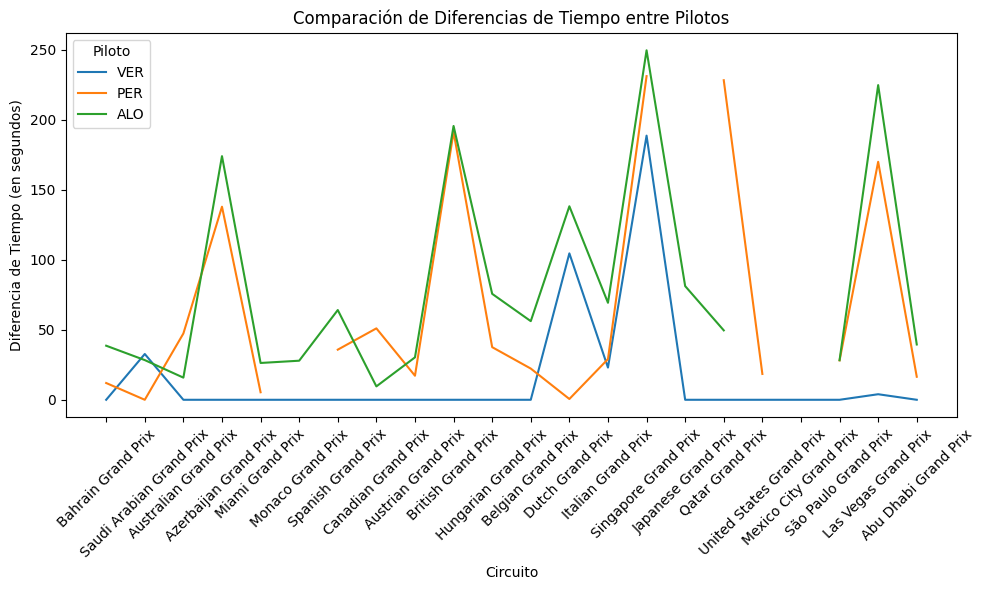

In [9]:
pilotos_comparar = ['VER', 'PER', 'ALO']

# Filtrar el DataFrame para estos pilotos
df_comparar = diferencias_temporada_2023[diferencias_temporada_2023['DriverAbbreviation'].isin(pilotos_comparar)]

# Convertir los valores Timedelta en segundos
df_comparar_numeric = df_comparar.iloc[:, :-1].apply(lambda x: x.dt.total_seconds())

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Para cada piloto, trazar una línea con sus diferencias de tiempo a lo largo de todas las carreras
for piloto in pilotos_comparar:
    plt.plot(df_comparar_numeric.columns, df_comparar_numeric[df_comparar['DriverAbbreviation'] == piloto].iloc[0], label=piloto)

# Añadir etiquetas y título
plt.xlabel('Circuito')
plt.ylabel('Diferencia de Tiempo (en segundos)')
plt.title('Comparación de Diferencias de Tiempo entre Pilotos')
plt.xticks(rotation=45)  # Rotar los nombres de los circuitos para mejor legibilidad
plt.legend(title='Piloto')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [10]:
df_comparar_numeric

,Bahrain Grand Prix,Saudi Arabian Grand Prix,Australian Grand Prix,Azerbaijan Grand Prix,Miami Grand Prix,Monaco Grand Prix,Spanish Grand Prix,Canadian Grand Prix,Austrian Grand Prix,British Grand Prix,...,Dutch Grand Prix,Italian Grand Prix,Singapore Grand Prix,Japanese Grand Prix,Qatar Grand Prix,United States Grand Prix,Mexico City Grand Prix,São Paulo Grand Prix,Las Vegas Grand Prix,Abu Dhabi Grand Prix
DriverNumber,,,,,,,,,,,,,,,,,,,,,
1,0.000,32.718,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,104.619,23.018,188.739,0.000,0.000,0.00,0.0,0.000,3.968,0.000
11,11.987,0.000,47.370,137.961,5.384,NaN,35.812,51.028,17.188,191.353,...,0.566,29.082,231.273,NaN,228.340,18.46,NaN,28.132,170.063,16.453
14,38.637,28.361,15.826,174.101,26.305,27.921,64.127,9.570,30.317,195.664,...,138.270,69.312,249.721,81.239,49.598,NaN,NaN,28.299,224.848,39.512


In [4]:
results = session.results[['DriverNumber', 'Abbreviation']] 
results.set_index('DriverNumber', inplace=True)
df_final = pd.DataFrame(diferencias).join(results)
df_final.columns = ['TimeDifference', 'DriverAbbreviation']

# Ordenar por diferencia de tiempo
df_final.sort_values(by='TimeDifference', inplace=True)
df_final

,TimeDifference,DriverAbbreviation
DriverNumber,,
1,0 days 00:00:00,VER
11,0 days 00:00:11.987000,PER
14,0 days 00:00:38.637000,ALO
55,0 days 00:00:48.052000,SAI
44,0 days 00:00:50.977000,HAM
18,0 days 00:00:54.502000,STR
63,0 days 00:00:55.873000,RUS
77,0 days 00:01:12.647000,BOT
10,0 days 00:01:13.753000,GAS


In [76]:
def tiempo_total(year, race_name):
    # Cargar la sesión de carrera
    session = fastf1.get_session(year, race_name, 'R')  # 'R' para carrera (race)
    session.load()

    # Obtener las vueltas de todos los pilotos
    laps = session.laps

    # Filtrar los pilotos que no completaron la carrera
    classification = session.results  # Resultados finales de la carrera
    finished_pilots = classification[classification['Status'] == 'Finished']['DriverNumber'].tolist()

    # Filtrar las vueltas solo para los pilotos que terminaron la carrera
    laps_finished = laps[laps['DriverNumber'].isin(finished_pilots)]
    print(laps_finished)
    # Agrupar por piloto y sumar los tiempos de vuelta
    tiempos_totales = laps.groupby('Driver')['LapTime'].sum()

    tiempos_totales_finished = tiempos_totales[tiempos_totales['Driver'].isin(finished_pilots)]

    # Convertir los tiempos totales a segundos
    tiempos_totales_segundos = tiempos_totales.apply(lambda x: x.total_seconds())

    return tiempos_totales_segundos


tiempo_total_segundos= tiempo_total(2023, 4)

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', '22', '81', '23', '20', '10', '31', '2', '27', '77', '24', '21']


                      Time Driver DriverNumber                LapTime  \
0   0 days 01:04:52.482000    VER            1 0 days 00:01:50.456000   
1   0 days 01:06:40.189000    VER            1 0 days 00:01:47.707000   
2   0 days 01:08:27.866000    VER            1 0 days 00:01:47.677000   
3   0 days 01:10:14.974000    VER            1 0 days 00:01:47.108000   
4   0 days 01:12:02.450000    VER            1 0 days 00:01:47.476000   
..                     ...    ...          ...                    ...   
957 0 days 02:30:05.748000    PIA           81 0 days 00:01:47.158000   
958 0 days 02:31:52.808000    PIA           81 0 days 00:01:47.060000   
959 0 days 02:33:39.238000    PIA           81 0 days 00:01:46.430000   
960 0 days 02:35:25.351000    PIA           81 0 days 00:01:46.113000   
961 0 days 02:37:10.982000    PIA           81 0 days 00:01:45.631000   

     LapNumber  Stint PitOutTime PitInTime            Sector1Time  \
0          1.0    1.0        NaT       NaT            

KeyError: 'Driver'

In [70]:
tiempo_total_segundos

Driver
ALB    5651.059
ALO    5256.840
GAS    5653.768
HAM    5454.184
LEC    5246.850
MAG    5476.211
NOR    5489.465
OCO    5353.644
PER    5220.700
PIA    5498.384
RUS    5164.658
SAI    5128.596
SAR    5508.934
STR    5138.649
TSU    5494.401
VER    5082.739
Name: LapTime, dtype: float64

In [17]:
resultados = []
for lap in carrera.laps:
        if lap['DriverNumber'] is not None:
            resultados.append({
                'Circuito': carrera.event['EventName'],
                'Año': año,
                'Piloto': lap['Driver'],
                'Equipo': lap['Team'],
                'TiempoTotal': lap['LapTime'].total_seconds()})

TypeError: string indices must be integers, not 'str'

In [1]:


# Función para obtener datos de una temporada completa
def obtener_datos_temporada(año):
    resultados = []
    
    # Obtener todas las carreras de la temporada
    for ronda in range(1, 4):  # Suponiendo 23 rondas por temporada
        
        carrera = fastf1.get_session(año, ronda, 'R', backend='ergast')  # 'R' para la carrera
        carrera.load()
        
        for lap in carrera.laps:
            if lap['DriverNumber'] is not None:
                resultados.append({
                    'Circuito': carrera.event['EventName'],
                    'Año': año,
                    'Piloto': lap['Driver'],
                    'Equipo': lap['Team'],
                    'TiempoTotal': lap['LapTime'].total_seconds()})

    return resultados

# Calcular el margen de victoria con respecto al ganador de cada carrera
def calcular_margen(df):
    resultados = []
    
    for carrera in df['Circuito'].unique():
        sub_df = df[df['Circuito'] == carrera]
        ganador = sub_df['TiempoTotal'].min()
        sub_df['Margen_vs_Ganador'] = sub_df['TiempoTotal'] - ganador
        
        media = sub_df['TiempoTotal'].mean()
        sub_df['Margen_vs_Media'] = sub_df['TiempoTotal'] - media
        
        resultados.append(sub_df)
    
    return pd.concat(resultados)


In [10]:
#CARGA DE DATOS

# Cargar datos de las temporadas 2023 y 2024
datos_2023 = obtener_datos_temporada(2023)



core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


TypeError: string indices must be integers, not 'str'

In [8]:
print(datos_2023)

Hello


In [6]:
#OPERACIONES

# Unir los datos de ambas temporadas
datos = datos_2023

# Calcular el margen de victoria con respecto al ganador de cada carrera
def calcular_margen(df):
    resultados = []
    
    for carrera in df['Circuito'].unique():
        sub_df = df[df['Circuito'] == carrera]
        ganador = sub_df['TiempoTotal'].min()
        sub_df['Margen_vs_Ganador'] = sub_df['TiempoTotal'] - ganador
        
        media = sub_df['TiempoTotal'].mean()
        sub_df['Margen_vs_Media'] = sub_df['TiempoTotal'] - media
        
        resultados.append(sub_df)
    
    return pd.concat(resultados)

# Calcular el margen de victoria

datos_margen = calcular_margen(datos)

# Agrupar por carrera, piloto y equipo
margen_por_piloto = datos_margen.groupby(['Año', 'Piloto', 'Circuito']).agg({
    'Margen_vs_Ganador': 'sum',
    'Margen_vs_Media': 'sum'
}).reset_index()

margen_por_equipo = datos_margen.groupby(['Año', 'Equipo', 'Circuito']).agg({
    'Margen_vs_Ganador': 'sum',
    'Margen_vs_Media': 'sum'
}).reset_index()

# Graficar los resultados
def graficar_margen(df, agrupado_por='Piloto'):
    plt.figure(figsize=(10,6))
    
    for piloto in df[agrupado_por].unique():
        piloto_data = df[df[agrupado_por] == piloto]
        plt.plot(piloto_data['Circuito'], piloto_data['Margen_vs_Ganador'], marker='o', label=piloto)
    
    plt.title(f"Margen de victoria con respecto al ganador ({agrupado_por})")
    plt.xlabel("Circuito")
    plt.ylabel("Margen vs Ganador (s)")
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

# Graficar por pilotos y equipos
graficar_margen(margen_por_piloto, agrupado_por='Piloto')
graficar_margen(margen_por_equipo, agrupado_por='Equipo')

NameError: name 'datos_2023' is not defined